# English

In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# show confusion matrix between true and predicted labels
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.17.1


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
#!unzip "/gdrive/My Drive/Colab Notebooks/Emotion/archive (4).zip" -d "/gdrive/My Drive/Colab Notebooks/Emotion"

In [ ]:
import pandas as pd

In [ ]:
def handle_bad_lines(bad_line):
    # Replace extra semicolons in 'Text' field with a different character (e.g., comma)
    # You might need to adjust this logic based on the actual format of your data
    bad_line_str = ';'.join(bad_line)

    # Replace extra semicolons in 'Text' field with a different character (e.g., comma)
    parts = bad_line_str.split(';')
    if len(parts) > 2:
        parts[0] = parts[0].replace(';', ',')
        return ';'.join(parts[:2]) # Keep only first two fields
    else:
        return bad_line_str  # Keep the line as it is

In [ ]:
# Importing raw comments and labels
train = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Emotion/train.txt', sep=';', header=None, names=['Text', 'Emotion'],on_bad_lines=handle_bad_lines, engine='python')
val = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Emotion/val.txt', sep=';', header=None, names=['Text', 'Emotion'],on_bad_lines=handle_bad_lines, engine='python')
test = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Emotion/test.txt', sep=';', header=None, names=['Text', 'Emotion'],on_bad_lines=handle_bad_lines, engine='python')

# Preview of data
display(train.head())

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
# Defining the number of samples in train, validation and test dataset
size_train = train.shape[0]
size_val = val.shape[0]
size_test = test.shape[0]

# Defining the total number of samples
size_all = size_train + size_val + size_test
print("Train dataset has {} samples and represents {:.2f}% of overall data".format(size_train, size_train/size_all*100))
print("Validation dataset has {} samples and represents {:.2f}% of overall data".format(size_val, size_val/size_all*100))
print("Test dataset has {} samples and represents {:.2f}% of overall data".format(size_test, size_test/size_all*100))
print()
print("The total number of samples is : {}".format(size_all))

Train dataset has 16000 samples and represents 80.00% of overall data
Validation dataset has 2000 samples and represents 10.00% of overall data
Test dataset has 2000 samples and represents 10.00% of overall data

The total number of samples is : 20000


In [ ]:
def get_tweets(data):
    tweets = data['Text']
    labels = data['Emotion']
    return tweets, labels

In [ ]:
tweets, labels = get_tweets(train)

In [ ]:
print(set(labels))

{'joy', 'anger', 'surprise', 'fear', 'love', 'sadness'}


In [ ]:
tweets[0], labels[0]

('i didnt feel humiliated', 'sadness')

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)
print(tweets[1])
tokenizer.texts_to_sequences([tweets[1]])

i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake


[[2,
  40,
  101,
  60,
  8,
  15,
  494,
  5,
  15,
  3496,
  553,
  32,
  60,
  61,
  128,
  148,
  76,
  1480,
  4,
  22,
  1255]]

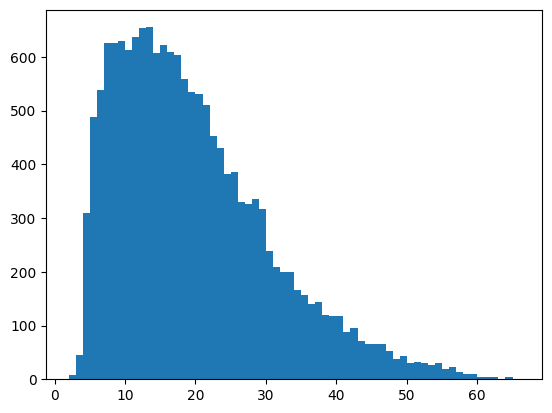

In [ ]:
lengths=[len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [ ]:
maxlen=50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer, tweets):
  sequences=tokenizer.texts_to_sequences(tweets)
  padded=pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

In [ ]:
padded_train_seq=get_sequences(tokenizer, tweets)

In [ ]:
classes = set(labels)
print(classes)

{'joy', 'anger', 'surprise', 'fear', 'love', 'sadness'}


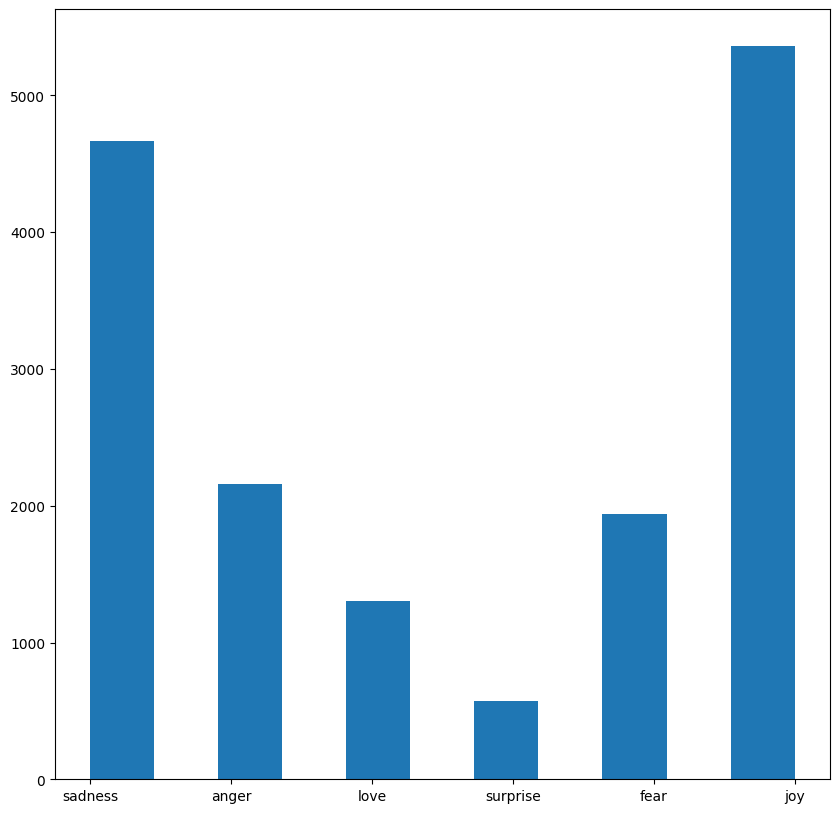

In [ ]:
plt.figure(figsize =(10,10))
plt.hist(labels, bins=11)
plt.show()

In [ ]:
class_to_index=dict((c,i) for i,c in enumerate(classes))
index_to_class=dict((v,k) for k,v in class_to_index.items())

In [ ]:
class_to_index

{'joy': 0, 'anger': 1, 'surprise': 2, 'fear': 3, 'love': 4, 'sadness': 5}

In [ ]:
index_to_class

{0: 'joy', 1: 'anger', 2: 'surprise', 3: 'fear', 4: 'love', 5: 'sadness'}

In [ ]:
names_to_indexes=lambda labels: np.array([class_to_index.get(x) for x in labels ])
train_labels=names_to_indexes(labels)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=maxlen),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=20, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=20)),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_39 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_40 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
val_tweets, val_labels = get_tweets(val)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = names_to_indexes(val_labels)

In [ ]:
hypothesis = model.fit(
    x=padded_train_seq,
    y=train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=20,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 67ms/step - accuracy: 0.3700 - loss: 1.5441 - val_accuracy: 0.6625 - val_loss: 0.9453
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.6994 - loss: 0.8342 - val_accuracy: 0.7270 - val_loss: 0.7474
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 71ms/step - accuracy: 0.7951 - loss: 0.5653 - val_accuracy: 0.7540 - val_loss: 0.6427
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.8589 - loss: 0.3991 - val_accuracy: 0.8075 - val_loss: 0.5723
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.9053 - loss: 0.2861 - val_accuracy: 0.8510 - val_loss: 0.4588
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9419 - loss: 0.1916 - val_accuracy: 0.8460 - val_loss: 0.4999
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9512 - loss: 0.1599 - val_accuracy: 0.8750 - val_loss: 0.4273
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.9659 - loss: 0.1172 - 

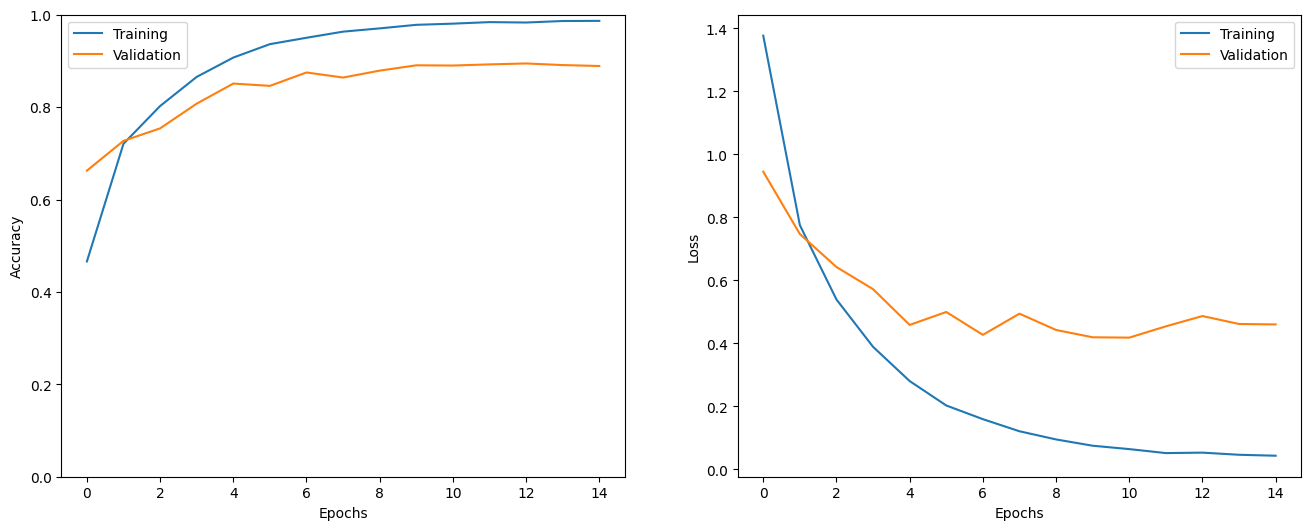

In [ ]:
show_history(hypothesis)

In [ ]:
test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_indexes(test_labels)

In [ ]:
model.evaluate(x=test_sequences, y=test_labels)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8761 - loss: 0.4930


[0.5045556426048279, 0.8709999918937683]

In [ ]:
i = random.randint(0, len(test_labels)-1)

print(f'Tweet : {test_tweets[i]}')
print(f'Emotion : {index_to_class[test_labels[i]]}')

i_prediction = model.predict(np.expand_dims(test_sequences[i], axis=0))[0]
predicted_class = index_to_class[np.argmax(i_prediction).astype('uint8')]

print(f'\nTweet : {test_tweets[i]}')
print(f'Predicted Emotion : {predicted_class}')

Tweet : i to feel unwelcome at her apartment certainly not
Emotion : sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Tweet : i to feel unwelcome at her apartment certainly not
Predicted Emotion : sadness


In [ ]:
predictions = model.predict(test_sequences)
predicted_classes = np.argmax(predictions, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


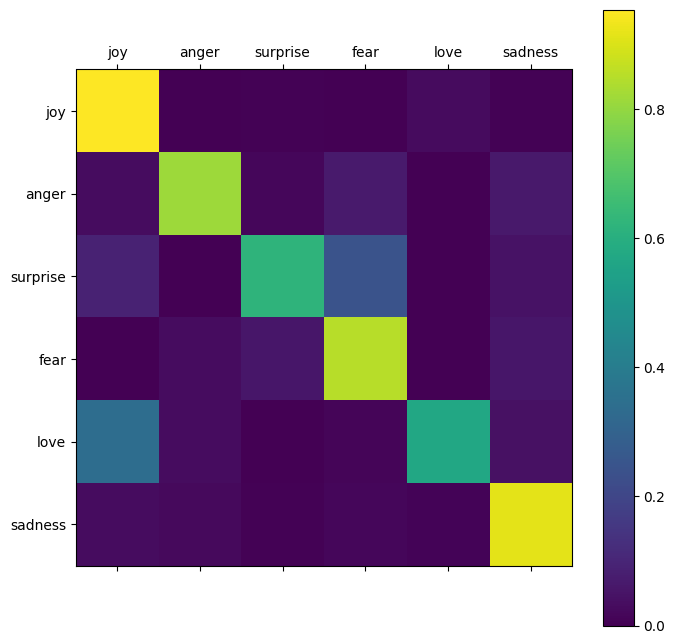

In [ ]:
show_confusion_matrix(test_labels, predicted_classes, list(classes))

# Vietnamese

In [ ]:
# Importing raw comments and labels
V_train = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Emotion/Vietnamese/Train1.txt', sep=';', header=None, names=['Text', 'Emotion'],on_bad_lines=handle_bad_lines, engine='python')
V_val = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Emotion/Vietnamese/Valid1.txt', sep=';', header=None, names=['Text', 'Emotion'],on_bad_lines=handle_bad_lines, engine='python')
V_test = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Emotion/Vietnamese/Test1.txt', sep=';', header=None, names=['Text', 'Emotion'],on_bad_lines=handle_bad_lines, engine='python')

# Preview of data
display(V_train.head())

,Text,Emotion
0,Đem đại nghĩa để thắng hung tàn lấy chí nhân đ...,tức giận
1,Làm sao có thể sống yên ổn khi còn biết bao ng...,tức giận
2,Bọn cướp bóc đã đẩy nhân dân vào cảnh khốn cùn...,tức giận
3,Sao cuộc đời lại đối xử tàn nhẫn với những ngư...,tức giận
4,Ai đi giữa khói lửa mịt mù không thể đứng yên ...,tức giận


In [ ]:
# Defining the number of samples in train, validation and test dataset
size_Vtrain = V_train.shape[0]
size_Vval = V_val.shape[0]
size_Vtest = V_test.shape[0]

# Defining the total number of samples
Vsize_all = size_Vtrain + size_Vval + size_Vtest
print("Train dataset has {} samples and represents {:.2f}% of overall data".format(size_Vtrain, size_Vtrain/Vsize_all*100))
print("Validation dataset has {} samples and represents {:.2f}% of overall data".format(size_Vval, size_Vval/Vsize_all*100))
print("Test dataset has {} samples and represents {:.2f}% of overall data".format(size_Vtest, size_Vtest/Vsize_all*100))
print()
print("The total number of samples is : {}".format(Vsize_all))

Train dataset has 382 samples and represents 65.41% of overall data
Validation dataset has 131 samples and represents 22.43% of overall data
Test dataset has 71 samples and represents 12.16% of overall data

The total number of samples is : 584


In [ ]:
V_tweets, V_labels = get_tweets(V_train)

In [ ]:
V_labels =V_labels.replace('vui ','vui')
V_labels =V_labels.replace(' vui','vui')
V_labels =V_labels.replace('sợ ','sợ')

In [ ]:
set(V_labels)

{'buồn', 'ngạc nhiên', 'sợ', 'tức giận', 'vui', 'yêu thương'}

In [ ]:
V_tweets[0], V_labels[0]

('Đem đại nghĩa để thắng hung tàn lấy chí nhân để thay cường bạo', 'tức giận')

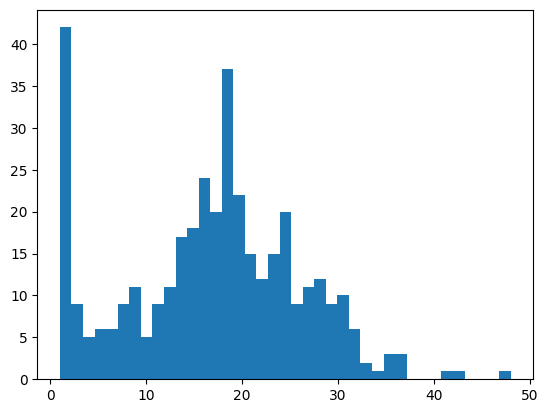

In [ ]:
V_lengths=[len(t.split(' ')) for t in V_tweets]
plt.hist(V_lengths, bins=len(set(V_lengths)))
plt.show()

In [ ]:
Vtokenizer=Tokenizer(num_words=10000, oov_token='<UNK>')
Vtokenizer.fit_on_texts(V_tweets)
Vpadded_train_seq=get_sequences(Vtokenizer, V_tweets)

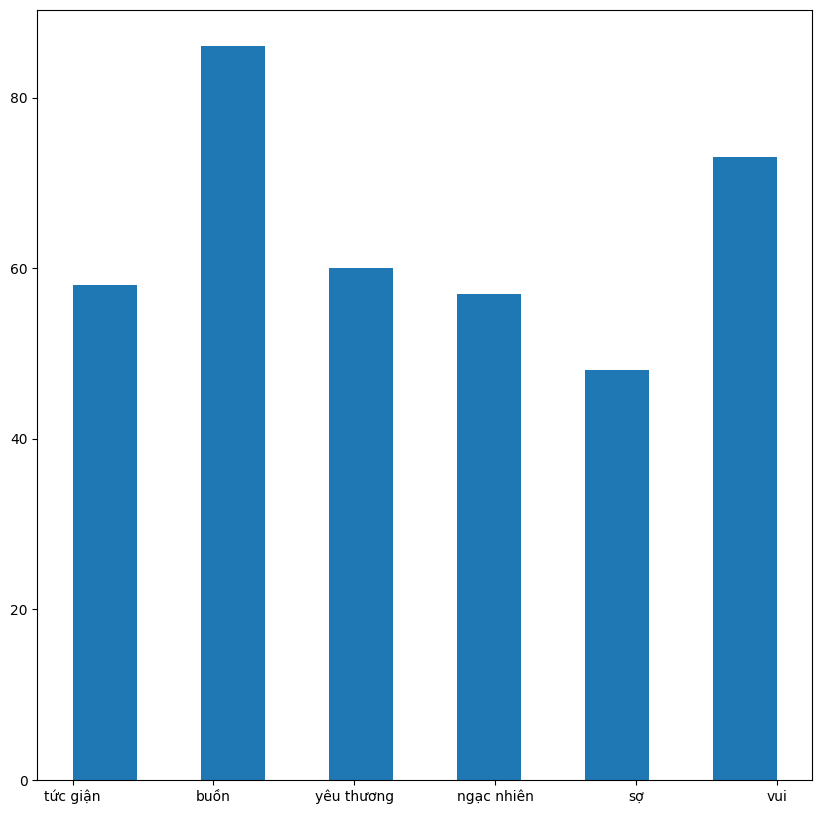

In [ ]:
plt.figure(figsize =(10,10))
plt.hist(V_labels, bins=11)
plt.show()

In [ ]:
V_classes = set(V_labels)
Vclass_to_index=dict((c,i) for i,c in enumerate(V_classes))
V_index_to_class=dict((v,k) for k,v in Vclass_to_index.items())

In [ ]:
Vclass_to_index

{'tức giận': 0, 'ngạc nhiên': 1, 'vui': 2, 'sợ': 3, 'buồn': 4, 'yêu thương': 5}

In [ ]:
V_index_to_class

{0: 'tức giận', 1: 'ngạc nhiên', 2: 'vui', 3: 'sợ', 4: 'buồn', 5: 'yêu thương'}

In [ ]:
Vnames_to_indexes=lambda labels: np.array([Vclass_to_index.get(x) for x in labels ])
Vtrain_labels=Vnames_to_indexes(V_labels)

In [ ]:
Vmodel = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=maxlen),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=20, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=20)),
  tf.keras.layers.Dense(6, activation='softmax')
])

Vmodel.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


Vmodel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_41 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_42 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Vval_tweets, Vval_labels = get_tweets(V_val)
Vval_sequences = get_sequences(Vtokenizer, Vval_tweets)
Vval_labels = Vnames_to_indexes(Vval_labels)

In [ ]:
Vhypothesis = Vmodel.fit(
    x=Vpadded_train_seq,
    y=Vtrain_labels,
    validation_data=(Vval_sequences, Vval_labels),
    epochs=20,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.1905 - loss: 1.7905 - val_accuracy: 0.0763 - val_loss: 1.7983
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.2270 - loss: 1.7739 - val_accuracy: 0.1527 - val_loss: 1.8171
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.3288 - loss: 1.7337 - val_accuracy: 0.1527 - val_loss: 1.8343
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.3637 - loss: 1.6437 - val_accuracy: 0.1832 - val_loss: 1.8653
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.3643 - loss: 1.5776 - val_accuracy: 0.1603 - val_loss: 1.7858
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.4267 - loss: 1.4701 - val_accuracy: 0.1985 - val_loss: 1.7255
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6271 - loss: 1.2300 - val_accuracy: 0.2672 - val_loss: 1.7230
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6855 - loss: 1.0462 - val_accuracy: 0.3130 

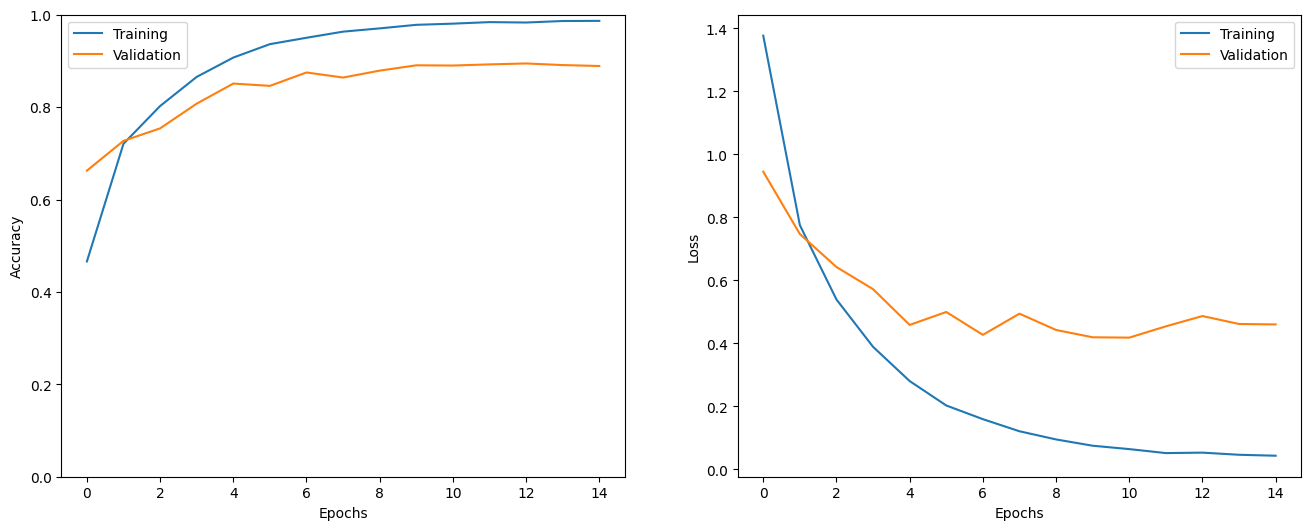

In [ ]:
show_history(hypothesis)

In [ ]:
Vtest_tweets, Vtest_labels = get_tweets(V_test)
Vtest_sequences = get_sequences(Vtokenizer, Vtest_tweets)
Vtest_labels = Vnames_to_indexes(Vtest_labels)

In [ ]:
import numpy as np

# Assuming Vtest_sequences is a list of lists (tokenized sequences)
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

Vtest_sequences = pad_sequences(Vtest_sequences, padding='post')

# Ensure Vtest_labels is a NumPy array with the correct data type
Vtest_labels = np.array([label if label is not None else 0 for label in Vtest_labels], dtype=np.int32)

model.evaluate(x=Vtest_sequences, y = Vtest_labels)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1736 - loss: 4.7820


[4.87795877456665, 0.18309858441352844]

In [ ]:
i = random.randint(0, len(Vtest_labels)-1)

print(f'Tweet : {Vtest_tweets[i]}')
print(f'Emotion : {V_index_to_class[Vtest_labels[i]]}')

i_prediction = model.predict(np.expand_dims(Vtest_sequences[i], axis=0))[0]
predicted_class = V_index_to_class[np.argmax(i_prediction).astype('uint8')]

print(f'\nTweet : {Vtest_tweets[i]}')
print(f'Predicted Emotion : {predicted_class}')

Tweet : tao thề tao rất sợ ma quỷ nên tao rất không dám xem phim
Emotion : sợ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

Tweet : tao thề tao rất sợ ma quỷ nên tao rất không dám xem phim
Predicted Emotion : tức giận


In [ ]:
predictions = model.predict(Vtest_sequences)
predicted_classes = np.argmax(predictions, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


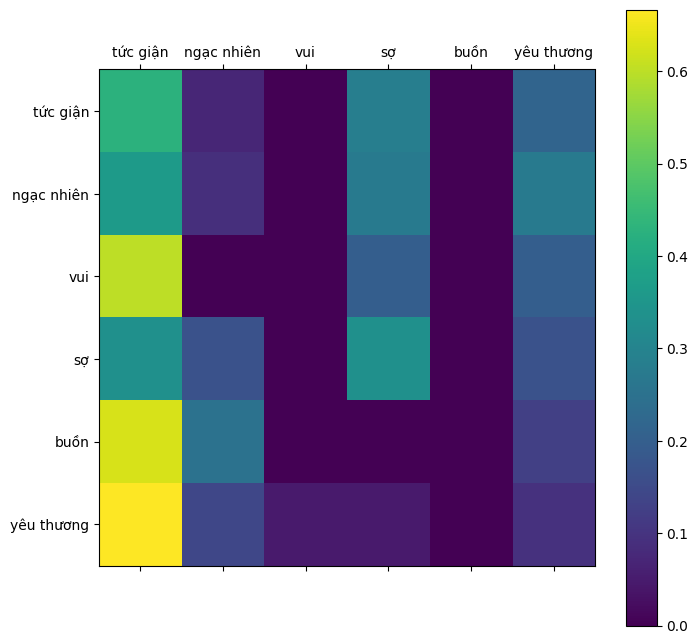

In [ ]:
show_confusion_matrix(Vtest_labels, predicted_classes, list(V_classes))